## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [95]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [96]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [98]:
df.index

RangeIndex(start=0, stop=294478, step=1)

c. The number of unique users in the dataset.

In [99]:
len(df['user_id'].unique())

290584

In [100]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [101]:
df.groupby(['converted']).count()
#df.converted.mean()

,user_id,timestamp,group,landing_page
converted,,,,
0,259241,259241,259241,259241
1,35237,35237,35237,35237


In [102]:
35237/294478

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [103]:
#get dataframes with landing page == 'new_page' and group== 'treatment' 
#as a and b respectively
a,b=df['landing_page']=='new_page',df['group']=='treatment'

In [104]:
#create a dataframe c that excludes when new_page & treatment are aligned
c=df[['group','landing_page']][np.logical_not(np.logical_and(a,b))]

In [105]:
#get dataframes form c with landing page == 'old_page' & group == 'control' 
#as d and e respectively
d,e=c['group']=='control',c['landing_page']=='old_page'

In [106]:
#create a dataframe f that excludes when control & old_age are aligned
#the final result is a dataframe that shows the missmatch
f=c[np.logical_not(np.logical_and(d,e))]

In [107]:
f.head()

,group,landing_page
22,control,new_page
240,control,new_page
308,treatment,old_page
327,treatment,old_page
357,treatment,old_page


In [108]:
# here's another way to solve this 
df[['group','landing_page']][((df['group']=='control')&(df['landing_page']=='new_page')) | ((df['group']=='treatment')&(df['landing_page']=='old_page'))].shape

(3893, 2)

In [109]:
f.shape[0]

3893

An a better way to solve this would have been to use pd.crosstab() for the dataframe columns we were interested in.

In [110]:
pd.crosstab(df.group,df.landing_page)

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


f. Do any of the rows have missing values?

In [111]:
assert df.notnull

In [112]:
#df.query('group=="treatment" and landing_page != "new_page" or group=="control" and landing_page=="new_page"').count()

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [113]:
#df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='control') & (df['landing_page']=='old_page'))]

In [114]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page' ").index, inplace = True)
df.drop(df.query("group == 'control' and landing_page == 'new_page' ").index, inplace = True)

In [115]:
df.to_csv('AB_dropped.csv',index=False)

In [116]:
df2=pd.read_csv('AB_dropped.csv')

In [117]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [118]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [119]:
df2[df2.user_id.duplicated()]['user_id']

2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [120]:
df2[df2.duplicated('user_id',keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [121]:
df2.drop(labels=2893,axis=0,inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [122]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [123]:
df2.groupby('group').describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787846.404026  91161.080674  630000.0  708748.25  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

In [124]:
control_converted=0.120386

Given that an individual was in the **control** group, probability they converted is **0.120386**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [125]:
treatment_converted=0.118808

Given that an individual was in the **treatment** group, probability they converted is **0.118808**

In [126]:
observed_diff=treatment_converted-control_converted
observed_diff

-0.00157800000000001

d. What is the probability that an individual received the new page?

In [127]:
#(df2['landing_page']=='new_page').mean()
df2['landing_page'][df2['landing_page']=='new_page'].count()/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**ANSWER**

***From the results above we see that there isn't a marked difference between the probability of the new treatment page group and the control group, infact, the probability of the treatment group converting was smaller.***

***Therefore we do not have sufficient evidence to conclude.***

***Taking into consideration that there are still other factors to consider such as test time span, change averson etc It will be wise to carry out further statistical significant tests.***

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**Hypothesis**

$H_0$: $P_{new}-$$P_{old}$ <= 0

$H_1$: $P_{new}-$$P_{old}$ > 0

Where $H_0$ represents the null hypothesis and $H_1$ represents the alternative hypothesis.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [128]:
P_new=df2['converted'].mean()
P_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

$P_{old}$ = $P_{new}$ based on the assumptions we made under the null hypothesis.

In [129]:
P_old=df2['converted'].mean()
P_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [130]:
N_new=df2.query('group =="treatment"').user_id.count()
N_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [131]:
N_old=df2.query('group=="control"').user_id.count()
N_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [132]:
new_page_converted = np.random.binomial(1,p=P_new,size=N_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [133]:
old_page_converted=np.random.binomial(1,p=P_old,size=N_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [134]:
diff=new_page_converted.mean() - old_page_converted.mean()
diff

0.002069640383214999

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [135]:
p_diffs=[]
new_convert_sim=np.random.binomial(N_new,P_new,10000)/N_new
old_convert_sim=np.random.binomial(N_old,P_old,10000)/N_old
p_diffs=new_convert_sim-old_convert_sim

In [136]:
p_diffs

array([-0.00194317, -0.00119983, -0.00156438, ...,  0.00088563,
        0.0012574 , -0.00159208])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

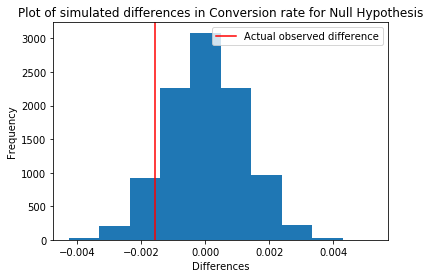

In [137]:
p_diffs=np.array(p_diffs)
plt.title('Plot of simulated differences in Conversion rate for Null Hypothesis');
plt.xlabel('Differences');
plt.ylabel('Frequency');
plt.axvline(observed_diff,color='r',label='Actual observed difference');
plt.hist(p_diffs);
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [138]:
(p_diffs>observed_diff).mean()

0.9073

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**ANSWER**

***The value we just calculated above is the *P-Value* and is approximately equal to *0.9044*. It shows us the probability of obtaining an observed statistic given the null hypothesis. The P-value here is far greater than 𝛂; which is the chance of a type I error occuring if the null is true. 𝛂 is set at 0.05.***

***Having a large P-value means the observed statistic is more likely to occure at a null hypothesis. Therefore, we can conclude that there is no statistical evidence to reject the null hypothesis which implied that there is no conversion advantage with the new page.***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [139]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" & converted==1').user_id.count()
convert_new = df2.query('landing_page=="new_page" & converted==1').user_id.count()
n_old = df2.query('landing_page=="old_page"').user_id.count()
n_new =df2.query('landing_page=="new_page"').user_id.count() 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [140]:
z_score,p_value=sm.stats.proportions_ztest(count=[convert_new,convert_old],nobs=[n_new,n_old],alternative='larger')
print("z score is : %f\nP vlaue is :%f" %(z_score,p_value))

z score is : -1.310924
P vlaue is :0.905058


In [141]:
from scipy.stats import norm
print("The significance of our Z score is: %f" %(norm.cdf(z_score)))

The significance of our Z score is: 0.094942


**Next we check the critical value at a 95% confidence interval.**

In [142]:
print("The critical value on a 95%% critical value is: %f" %(norm.ppf(1-(0.05))))

The critical value on a 95% critical value is: 1.644854


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**ANSWER**

**From the Z score calculated compared to the critical value at α=0.05, it is clear that the Z-score is lower than the critical level thus we fail to reject the null hypothesis. Also the p_value calculated(0.905058) is larger than our α meaning we fail to reject the null hypothesis.**

**This means that from the computed P value and Z score we must uphold our null hypothesis i.e the conversion rate of the old page is better or equal to the new page**

**The values calculated are in line with the findings in parts J and K**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

**Logistic Regression; because the dependent variable(conversion) is binary(1 or 0, either or)**

b. The goal is to use **statsmodels** to fit the regression model that was specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, first we need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  We added an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [143]:
df2['intercept']=1
df2[['ab_page2','ab_page']]=pd.get_dummies(df2['group'])
df2.drop('ab_page2',axis=1,inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. We then use **statsmodels** to instantiate the regression model on the two columns we created in part b., then we fit the model using the two columns ywe created in part **b.** to predict whether or not an individual converts. 

In [144]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [145]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               8.077e-06
Time:                        07:41:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**ANSWER**

**The P-value here is 0.190 and it differs from the one calculated in Part II because**

**This is a two-tailed test and our hypothesis here is**

$H_0$: $P_{new}-$$P_{old}$ = 0

$H_1$: $P_{new}-$$P_{old}$ != 0


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANSWER**

***Adding other factors to our model with help us determine the relative influence of those other factors on our dependent variable; conversion.
Also adding other factors to our model might avail us the chance to detect outliers or anomalies.***

***A disadvantage is that there may be overlap or corrolation between the predictor variables i.e multi collinearity.***

***Lastly, Every time we include a new predictor variable with no change in sample size we lose a degree of freedom. This means is that previously significant predictor looses signifigance in our the new regression model at the same probability of a Type 1 error (the significance level).***

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

### ***Testing to see the impact of countries on conversion***

In [146]:
countries_df=pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [147]:
new_df=countries_df.set_index('user_id').join(df2.set_index('user_id'),how='right')
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [148]:
new_df.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [149]:
#create the dummy variables for the country columns
new_df[['UK', 'US']] = pd.get_dummies(new_df['country'])[['UK','US']]
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1


In [150]:
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'UK', 'US', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               2.323e-05
Time:                        07:41:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**From the Logistic regression output of our model that includes countries, the p-value for both countries yields a value larger than 0.05; hence, there is no statistical evidence on country's significant impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [151]:
#for interaction between page and country
new_df['UK_ab_page'] = new_df['UK'] * new_df['ab_page']
new_df['US_ab_page'] = new_df['US'] * new_df['ab_page']
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,0,1


In [152]:
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               3.482e-05
Time:                        07:41:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**From the Logistic regression output of our model, even after including the interaction between page and country, the p-values of the variables are all larger than 0.05; hence, there is no statistical evidence to include these variables in our model as having a significant impact on conversion.**

### ***Testing to see the impact of aspects of Time on Conversion***

In [153]:
#create dummy variables for different aspects of time

In [154]:
#convert timestamp clumn to datetime
new_df['timestamp']=pd.to_datetime(new_df['timestamp'])

In [155]:
new_df.timestamp.dtype

dtype('<M8[ns]')

In [156]:
new_df['timestamp'].head()

user_id
630000   2017-01-19 06:26:06.548941
630001   2017-01-16 03:16:42.560309
630002   2017-01-19 19:20:56.438330
630003   2017-01-12 10:09:31.510471
630004   2017-01-18 20:23:58.824994
Name: timestamp, dtype: datetime64[ns]

In [157]:
#sort the timestamp column to get a sense of the the time data
new_df[['timestamp']].sort_values(by=['timestamp'],ascending=True).head()

,timestamp
user_id,
922696,2017-01-02 13:42:05.378582
781507,2017-01-02 13:42:15.234051
737319,2017-01-02 13:42:21.786186
818377,2017-01-02 13:42:26.640581
725857,2017-01-02 13:42:27.851110


In [158]:
Duration_of_AB_Test=new_df.timestamp.max()-new_df.timestamp.min()

In [159]:
#find out duration of the A/B experiment was run for
print('The A/B test experiment was run for approximately %.1f days' %(Duration_of_AB_Test/np.timedelta64(1,'D')))

The A/B test experiment was run for approximately 22.0 days


In [160]:
new_df[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 630000 to 945999
Data columns (total 1 columns):
timestamp    290584 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.4 MB


In [161]:
new_df['timestamp'].dt.hour.unique()

array([ 6,  3, 19, 10, 20, 21,  5, 16, 23,  9,  4,  7, 11, 15, 17, 18, 22,
       12,  0,  1,  8,  2, 13, 14])

In [162]:
#round up to the nearest minute and check the time the stite was most visited
new_df['Timestamp_Rounded_Min']=new_df.timestamp.dt.round('Min')
new_df.Timestamp_Rounded_Min.dt.hour.value_counts()

16    12277
1     12238
5     12234
14    12231
17    12214
7     12185
11    12152
22    12142
19    12141
3     12135
12    12133
10    12132
18    12122
23    12111
8     12103
2     12073
20    12063
6     12055
21    12047
13    12019
4     12007
9     11961
0     11917
15    11892
Name: Timestamp_Rounded_Min, dtype: int64

#### **Impact of Weekday on conversion**

In [163]:
new_df['Weekday']=new_df.Timestamp_Rounded_Min.dt.weekday_name

In [164]:
new_df[['Weekday']].head()

,Weekday
user_id,
630000,Thursday
630001,Monday
630002,Thursday
630003,Thursday
630004,Wednesday


In [165]:
new_df.Weekday.value_counts()

Tuesday      47153
Monday       45435
Sunday       39916
Saturday     39674
Friday       39630
Wednesday    39565
Thursday     39211
Name: Weekday, dtype: int64

***Tuesday occures the most frequent so it makes more sense to exclude it and use it as a refrence category***

In [166]:
df_Time,df_Week=new_df.copy(),new_df.copy()

In [167]:
df_Week_dummies=pd.get_dummies(df_Week.Weekday)

In [168]:
#delete Tuesday because it is our refrence category
del df_Week_dummies['Tuesday']

In [169]:
df_Week_dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Wednesday
user_id,,,,,,
630000,0,0,0,0,1,0
630001,0,1,0,0,0,0
630002,0,0,0,0,1,0
630003,0,0,0,0,1,0
630004,0,0,0,0,0,1


In [170]:
df_Week=pd.concat([df_Week,df_Week_dummies],axis=1)

In [171]:
df_Week.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page,Timestamp_Rounded_Min,Weekday,Friday,Monday,Saturday,Sunday,Thursday,Wednesday
user_id,,,,,,,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,0,1,2017-01-19 06:26:00,Thursday,0,0,0,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,0,1,2017-01-16 03:17:00,Monday,0,1,0,0,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1,0,0,2017-01-19 19:21:00,Thursday,0,0,0,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,0,1,2017-01-12 10:10:00,Thursday,0,0,0,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,0,1,2017-01-18 20:24:00,Wednesday,0,0,0,0,0,1


In [172]:
log_mod = sm.Logit(df_Week['converted'], df_Week[['intercept','ab_page','Monday','Wednesday','Thursday', 'Friday','Saturday','Sunday',]])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            7
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               3.311e-05
Time:                        07:41:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.4243
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9899      0.015   -130.147      0.000      -2.020      -1.960
ab_page       -0.0149      0.011     -1.306      0.192      -0.037       0.007
Monday         0.0156      0.020      0.774      0.439      -0.024       0.055
Wednesday      0.0086      0.021      0.408      0.683      -0.033       0.050
Thursday       0.0041      0.021      0.197      0.844      -0.037       0.045
Friday        -0.0259      0.021     -1.226      0.220      -0.067       0.016
Saturday       0.0125      0.021      0.598      0.550      -0.029       0.054
Sunday        -0.0096      0.021     -0.458      0.647      -0.051       0.032
==============================================================================
"""

In [173]:
df_Week['Mon_ab_page']=df_Week['ab_page']*df_Week['Monday']
df_Week['Wed_ab_page']=df_Week['ab_page']*df_Week['Wednesday']
df_Week['Thur_ab_page']=df_Week['ab_page']*df_Week['Thursday']
df_Week['Fri_ab_page']=df_Week['ab_page']*df_Week['Friday']
df_Week['Sat_ab_page']=df_Week['ab_page']*df_Week['Saturday']
df_Week['Sun_ab_page']=df_Week['ab_page']*df_Week['Sunday']

In [174]:
log_mod = sm.Logit(df_Week['converted'], df_Week[['intercept','ab_page','Monday','Wednesday','Thursday', 'Friday','Saturday','Sunday','Mon_ab_page','Wed_ab_page','Thur_ab_page','Fri_ab_page','Sat_ab_page','Sun_ab_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366091
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290570
Method:                           MLE   Df Model:                           13
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               8.432e-05
Time:                        07:41:58   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1597
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -2.0239      0.020    -99.874      0.000      -2.064      -1.984
ab_page          0.0527      0.028      1.855      0.064      -0.003       0.108
Monday           0.0572      0.029      2.000      0.046       0.001       0.113
Wednesday        0.0497      0.030      1.671      0.095      -0.009       0.108
Thursday         0.0480      0.030      1.608      0.108      -0.011       0.106
Friday          -0.0087      0.030     -0.288      0.774      -0.068       0.050
Saturday         0.0734      0.030      2.485      0.013       0.016       0.131
Sunday           0.0273      0.030      0.917      0.359      -0.031       0.086
Mon_ab_page     -0.0829      0.040     -2.052      0.040      -0.162      -0.004
Wed_ab_page     -0.0819      0.042     -1.952      0.051      -0.164       0.000
Thur_ab_page    -0.0874      0.042     -2.075      0.038      -0.170      -0.005
Fri_ab_page     -0.0343      0.042     -0.812      0.417      -0.117       0.048
Sat_ab_page     -0.1224      0.042     -2.920      0.004      -0.205      -0.040
Sun_ab_page     -0.0736      0.042     -1.750      0.080      -0.156       0.009
================================================================================
"""

**From the Logistic regression output of our model that includes only the days of the week, derived from the timestamp, we can see that the p-value yields a value larger than 0.05.**

**However, when we include the interaction of the days of the week and page, we see that some of the variables; Sat_ab_page, Thur_ab_page etc have P-values lower than 0.05 hence they are statistically significant and the others having P-values above 0.05 aren't significant. Therefore some of these variables may have an impact on conversion.**

#### **Impact of Time of Day on Conversion**

An approach may be to extract the hours of the day and encode or transform it using sine and cosine. The hour of the day for example is a cyclic occurence, after 23 you go back to 0 even though they are very close together, using it as a single variable loses that relationship. By mapping it on a circle with the sine and the cosine function you can maintain that relationship[1]. This creates two instead of one variable but requires less dimensions than using a dummy variable which would require 24 variables, and in this approach, time is continous.[2]

Generally from research, the approach will depend on the degree of freedom constraint of our experiment.[3] and also thetype of variable selection is a modelling choice and it will depend on if the dependent variable varies continously throughout the day.

To find out the effect of time of day on conversion we binned the various timestamps into different groups of Morning, Afternoon, Evening and Night. Apart from the inherent issue with binning 

In [175]:
df_Time.assign(Period=pd.cut(df_Time.Timestamp_Rounded_Min.dt.hour,[-1,5,12,18,23],labels=['Night','Morning','Afternoon','Evening'])).head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page,Timestamp_Rounded_Min,Weekday,Period
user_id,,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,0,1,2017-01-19 06:26:00,Thursday,Morning
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,0,1,2017-01-16 03:17:00,Monday,Night
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1,0,0,2017-01-19 19:21:00,Thursday,Evening
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,0,1,2017-01-12 10:10:00,Thursday,Morning
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,0,1,2017-01-18 20:24:00,Wednesday,Evening


In [176]:
df_Time['Period']=pd.cut(df_Time.Timestamp_Rounded_Min.dt.hour,[-1,5,12,18,23],labels=['Night','Morning','Afternoon','Evening'])

In [177]:
del df_Time['timestamp']

In [178]:
Period_dummies=pd.get_dummies(df_Time['Period'])

In [179]:
df_Time=pd.concat([df_Time,Period_dummies],axis=1)

In [180]:
df_Time.head()

,country,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page,Timestamp_Rounded_Min,Weekday,Period,Night,Morning,Afternoon,Evening
user_id,,,,,,,,,,,,,,,,,
630000,US,treatment,new_page,0,1,1,0,1,0,1,2017-01-19 06:26:00,Thursday,Morning,0,1,0,0
630001,US,treatment,new_page,1,1,1,0,1,0,1,2017-01-16 03:17:00,Monday,Night,1,0,0,0
630002,US,control,old_page,0,1,0,0,1,0,0,2017-01-19 19:21:00,Thursday,Evening,0,0,0,1
630003,US,treatment,new_page,0,1,1,0,1,0,1,2017-01-12 10:10:00,Thursday,Morning,0,1,0,0
630004,US,treatment,new_page,0,1,1,0,1,0,1,2017-01-18 20:24:00,Wednesday,Evening,0,0,0,1


In [181]:
df_Time.Period.value_counts()

Morning      84721
Afternoon    72755
Night        72604
Evening      60504
Name: Period, dtype: int64

**We will drop the morning category because it is the most frequently occuring as such, it will serve as our refrence variable.**

In [182]:
#df_Time.drop('Morning',axis=1,inplace=True)

In [183]:
log_mod = sm.Logit(df_Time['converted'], df_Time[['intercept','Night','Afternoon','Evening']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366103
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               4.919e-05
Time:                        07:41:59   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.01498
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9845      0.011   -188.271      0.000      -2.005      -1.964
Night         -0.0433      0.016     -2.767      0.006      -0.074      -0.013
Afternoon      0.0030      0.015      0.192      0.848      -0.027       0.033
Evening       -0.0088      0.016     -0.539      0.590      -0.041       0.023
==============================================================================
"""

**To add the interaction of the page and period of day in our model**

In [184]:
df_Time['Night_ab_page']=df_Time['ab_page']*df_Time['Night']
df_Time['Afternoon_ab_page']=df_Time['ab_page']*df_Time['Afternoon']
df_Time['Evening_ab_page']=df_Time['ab_page']*df_Time['Evening']

In [185]:
log_mod = sm.Logit(df_Time['converted'], df_Time[['intercept','ab_page','Night','Afternoon','Evening','Night_ab_page','Afternoon_ab_page','Evening_ab_page' ]])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366093
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            7
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:               7.688e-05
Time:                        07:42:00   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.02204
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9672      0.015   -132.857      0.000      -1.996      -1.938
ab_page              -0.0348      0.021     -1.649      0.099      -0.076       0.007
Night                -0.0426      0.022     -1.937      0.053      -0.086       0.001
Afternoon            -0.0135      0.022     -0.618      0.537      -0.056       0.029
Evening              -0.0368      0.023     -1.592      0.111      -0.082       0.008
Night_ab_page        -0.0014      0.031     -0.043      0.965      -0.063       0.060
Afternoon_ab_page     0.0332      0.031      1.071      0.284      -0.028       0.094
Evening_ab_page       0.0562      0.033      1.716      0.086      -0.008       0.120
=====================================================================================
"""

**From the Logistic regression output of our model, we see that grouping the timestmps into bins of different time periods of the day and including them in our model has no significant impact on conversion because the p-values of the variables are all larger than 0.05; hence, there is no statistical evidence to include these variables in our model as having a significant impact on conversion.**

## Conclusion

* **Using different methodology in part II and part III, p-value changed, but in either case, we fail to reject the null as value is still higher than alpha.**


* **Based on this analysis, there is no practical significance in rolling out the new page over old page. Conversion rate for old page is better than the new page, albeit not by a lot.** 


* **Comparing users among different countries also doesn't show considerable difference in conversion.**


* **In trying to determine the effect of time on the conversion we used the day of the week and the period of the day as categorical variables and we say that generally these variables had little to no effect on conversion except for the interaction between saturday and monday and the page groups. For these two variables they seemed to show a negative effect on conversion relative to Tuesday which was our refrence category.** 


* **Lastly, binning the timestamps into periods might have resulted in loss of information. To test this, further analysis can be carried out using the hours of the day as dummy varibles.[4]**

**These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data.**

### REFRENCES

* [1]: https://datascience.stackexchange.com/questions/12069/time-stamp-for-linear-model
* [2]: https://www.reddit.com/r/MachineLearning/comments/1utxnk/how_do_you_represent_timeofday_in_artificial/
* [3]: https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)
* [4]: https://stats.stackexchange.com/questions/68834/what-is-the-benefit-of-breaking-up-a-continuous-predictor-variable


In [186]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0